In [64]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [65]:
L0 = 1
m = 1
R = 1
g = 9.8
b = 0.2
k = 1

the1, the2, the3 = smp.symbols(r"\theta_1 \theta_2 \theta_3", cls = smp.Function)
t = smp.symbols("t")

the1 = the1(t)
the2 = the2(t)
the3 = the3(t)

the1_d = smp.diff(the1,t)
the2_d = smp.diff(the2,t)
the3_d = smp.diff(the3,t)

the1_dd = smp.diff(the1_d,t)
the2_dd = smp.diff(the2_d,t)
the3_dd = smp.diff(the3_d,t)


In [ ]:
ke = 0.5*m*((R*the1_d)**2 + (R*the2_d)**2 + (R*the3_d)**2)

x1 = R*smp.sin(the1)
x2 = R*smp.sin(the2)+L0
x3 = R*smp.sin(the3)+2*L0

y1 = -R*smp.cos(the1)
y2 = -R*smp.cos(the2)
y3 = -R*smp.cos(the3)

m1m2_disp = smp.sqrt((x1-x2)**2 + (y1-y2)**2) - L0
m2m3_disp = smp.sqrt((x2-x3)**2 + (y2-y3)**2) - L0

pe = 0.5*k*(m1m2_disp**2 + m2m3_disp**2) + m*g*(y1+y2+y3)

Lag = ke - pe

In [67]:
EL1 = smp.diff(smp.diff(Lag,the1_d),t) - smp.diff(Lag,the1)
EL2 = smp.diff(smp.diff(Lag,the2_d),t) - smp.diff(Lag,the2)
EL3 = smp.diff(smp.diff(Lag,the3_d),t) - smp.diff(Lag,the3)

EL = np.array([EL1, EL2, EL3])

EL = [smp.simplify(EL[i]) for i in range(3)]

sols = smp.solve(EL, (the1_dd,the2_dd,the3_dd))



In [68]:
args = (the1,the2,the3,the1_d,the2_d,the3_d)
funcs = [sols[the1_dd],sols[the2_dd],sols[the3_dd]]
sols_f = smp.lambdify(args,funcs,"numpy")

In [69]:
def dsdt(state, t):
    the1,the2,the3,the1_d,the2_d,the3_d = state
    acc_cols = sols_f(*state)
    acc_vals = np.array(acc_cols).flatten()
    acc_vals = acc_vals - (b/m)*np.array([the1_d,the2_d,the3_d])
    return the1_d,the2_d,the3_d,*acc_vals

In [70]:
t = np.linspace(0,50,1000)
initial = (1,0,0,0,0,0)

solutions = odeint(dsdt,initial, t=t)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in scalar divide
  return [-9.8*sin(_Dummy_463) + sin(_Dummy_462 - _Dummy_463) - 0.707106781186548*sin(_Dummy_462 - _Dummy_463)/sqrt(1.0 - cos(_Dummy_462 - _Dummy_463)), -9.8*sin(_Dummy_462) + sin(_Dummy_461 - _Dummy_462) - sin(_Dummy_462 - _Dummy_463) + 0.707106781186548*sin(_Dummy_462 - _Dummy_463)/sqrt(1.0 - cos(_Dummy_462 - _Dummy_463)) - 0.707106781186548*sin(_Dummy_461 - _Dummy_462)/sqrt(1.0 - cos(_Dummy_461 - _Dummy_462)), -9.8*sin(_Dummy_461) - sin(_Dummy_461 - _Dummy_462) + 0.707106781186548*sin(_Dummy_461 - _Dummy_462)/sqrt(1.0 - cos(_Dummy_461 - _Dummy_462))]


In [ ]:
the1_d = solutions[:,3]
the2_d = solutions[:,4]
the3_d = solutions[:,5]

the1 = solutions[:,0]
the2 = solutions[:,1]
the3 = solutions[:,2]

ke = 0.5*m*(the1_d**2 + the2_d**2 + the3_d**2)

x1 = R*np.sin(the1)
x2 = R*np.sin(the2)+L0
x3 = R*np.sin(the3)+2*L0

y1 = -R*np.cos(the1)
y2 = -R*np.cos(the2)
y3 = -R*np.cos(the3)

m1m2_disp = np.sqrt((x1-x2)**2 + (y1-y2)**2)
m2m3_disp = np.sqrt((x2-x3)**2 + (y2-y3)**2)

pe = 0.5*k*(m1m2_disp**2+m2m3_disp**2) + m*g*(y1+y2+y3)

TE = ke+pe

In [72]:
the1_d


array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

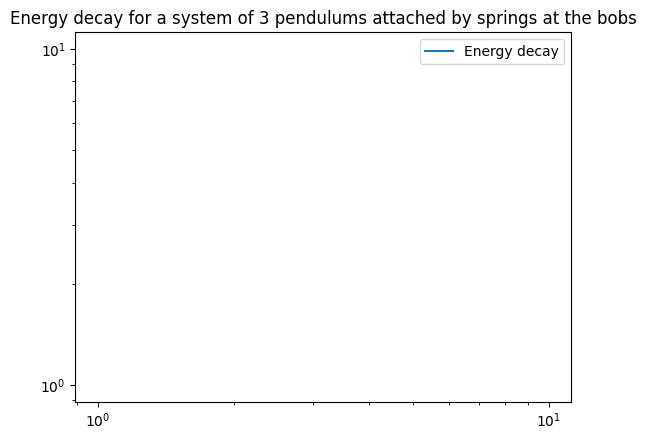

In [73]:
plt.figure()
plt.loglog(t[1:], TE[1:], label="Energy decay")
plt.legend()
plt.title("Energy decay for a system of 3 pendulums attached by springs at the bobs")
plt.show()